In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('/Users/houhiroshisakai/Desktop/Schulich/MBAN 6110 S - Data Science I/midterm_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [4]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [7]:
#Checking if any row has both 'device' and 'location' missing
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [9]:
# Fill in missing Device & location data with "Other" 
df['device'] = df['device'].fillna('Other')
df['location'] = df['location'].fillna('Other')

In [10]:
#Drop Dupplicate 
df.drop_duplicates()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [11]:
#Check the data has been changed to on-null successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           5000 non-null   object 
 9   location         5000 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


<Axes: >

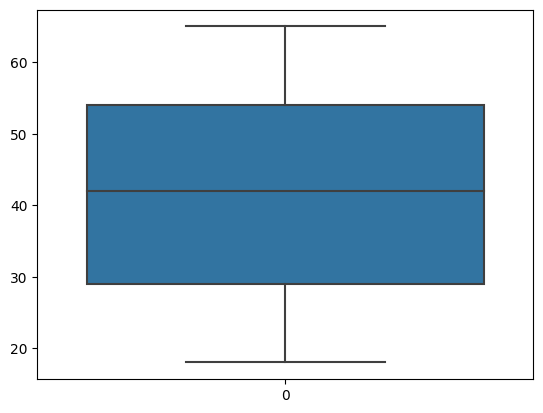

In [14]:
#Checking and Filtering outlier
sns.boxplot(df['age'])

<Axes: >

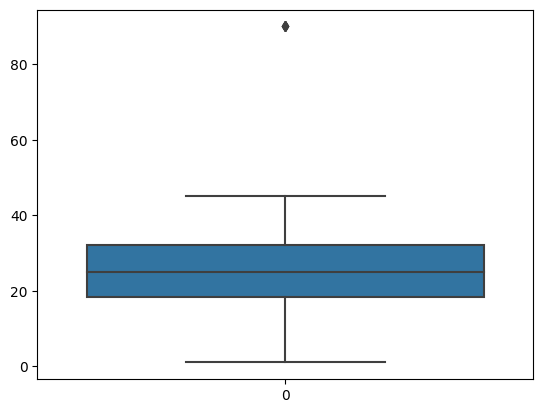

In [15]:
sns.boxplot(df['time_spent'])

<Axes: >

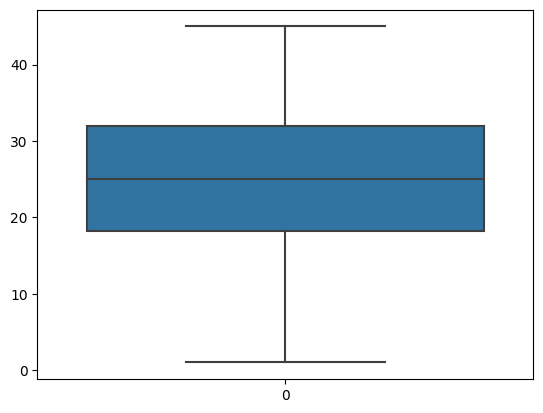

In [19]:
#Dropping the outlier
df.drop(df[df['time_spent'] > 80].index,inplace = True)
sns.boxplot(df['time_spent'])

<Axes: >

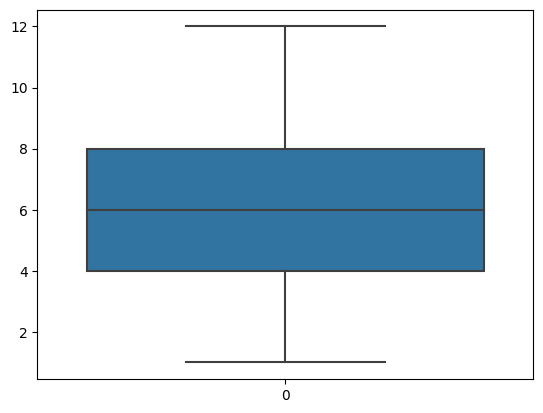

In [24]:
sns.boxplot(df['pages_visited'])

<Axes: >

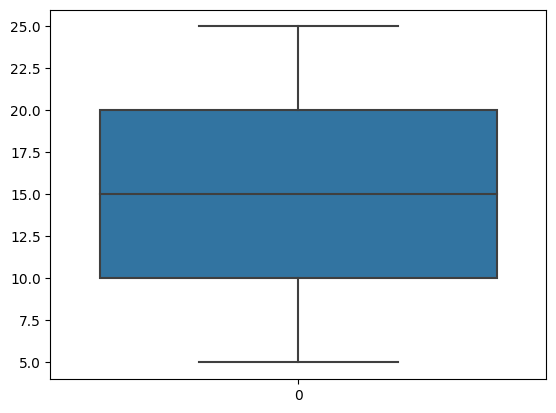

In [22]:
sns.boxplot(df['cart_items'])

<Axes: >

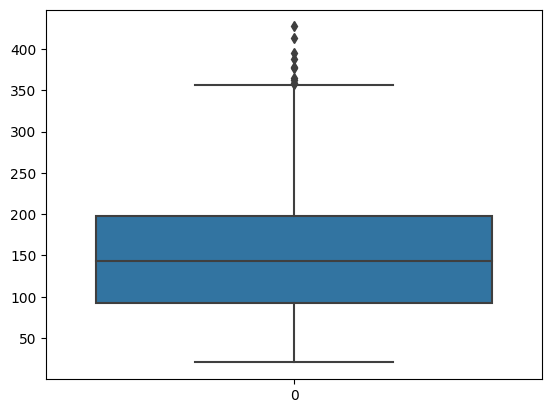

In [27]:
#Keep the value of outliers since there too much.
sns.boxplot(df['cart_value'])

In [26]:
#Check the final result after data cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4996 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4996 non-null   int64  
 1   age              4996 non-null   int64  
 2   sessions         4996 non-null   int64  
 3   time_spent       4996 non-null   float64
 4   pages_visited    4996 non-null   int64  
 5   cart_items       4996 non-null   int64  
 6   cart_value       4996 non-null   float64
 7   checkout_status  4996 non-null   int64  
 8   device           4996 non-null   object 
 9   location         4996 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 558.4+ KB


<Axes: xlabel='checkout_status', ylabel='Count'>

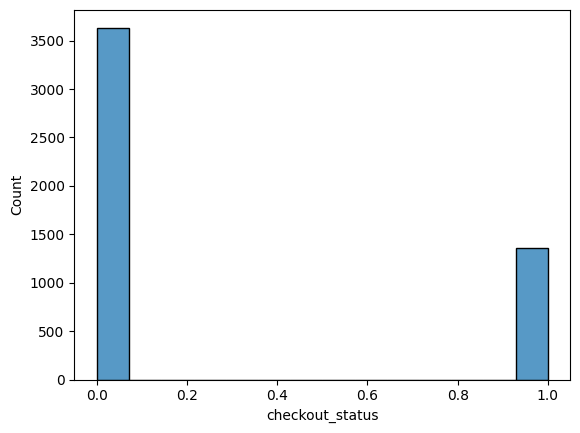

In [39]:
#Comparing which one is higher than another checkout status.
sns.histplot(df['checkout_status'])

In [41]:
#Compare two variance of Checking status with time spent
# H0 = the mean of the time spent of users checking out/app are same with the mean of the time spent of users who didn't check out.
from scipy import stats
check_out_time= df[df['checkout_status'] == 1]['time_spent']
not_check_out_time = df[df['checkout_status'] == 0]['time_spent']

t_stat_1, p_val_1 = stats.ttest_ind(check_out_time, not_check_out_time)

print(f"T-statistic: {t_stat_1}")
print(f"P-value: {p_val_1}")

T-statistic: 30.277770149978465
P-value: 4.9270409264476604e-185


In [42]:
#Compare two variance of Checking status with age
# H0 = the mean of the age of users who checked out are same with the mean of the age users who didn't check out.
check_out_age= df[df['checkout_status'] == 1]['age'] 
not_check_out_age = df[df['checkout_status'] == 0]['age']

t_stat_2, p_val_2 = stats.ttest_ind(check_out_age, not_check_out_age)

print(f"T-statistic: {t_stat_2}")
print(f"P-value: {p_val_2}")

T-statistic: -0.6798968886129201
P-value: 0.49660126593756404


In [56]:
#Checking mean value of two variant groups.
m1_check_out_age = check_out_age.mean()
m1_not_check_out_age = not_check_out_age.mean()
print("The mean of age checked out: ",(m1_check_out_age))
print("The mean of age not checked out: ",(m1_not_check_out_age))

The mean of age checked out:  41.32599118942731
The mean of age not checked out:  41.629334067143645


In [57]:
#Compare two variance of Checking status with time spent
# H0 = the mean of the number of pages vsited of users checking out/app are same with the mean of the number of pages visted of users who didn't check out.
check_out_pv= df[df['checkout_status'] == 1]['pages_visited']
not_check_out_pv = df[df['checkout_status'] == 0]['pages_visited']

t_stat_3, p_val_3 = stats.ttest_ind(check_out_pv, not_check_out_pv)

print(f"T-statistic: {t_stat_3}")
print(f"P-value: {p_val_3}")

T-statistic: 27.47146951327662
P-value: 7.534979639566005e-155


In [51]:
#Creating a dataframe copy
df1 = df.copy()
df1.drop(columns = ['device', 'location'],axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4996 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4996 non-null   int64  
 1   age              4996 non-null   int64  
 2   sessions         4996 non-null   int64  
 3   time_spent       4996 non-null   float64
 4   pages_visited    4996 non-null   int64  
 5   cart_items       4996 non-null   int64  
 6   cart_value       4996 non-null   float64
 7   checkout_status  4996 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 480.3 KB


In [61]:
# Standardize the features
scaler = StandardScaler()
df1_std = scaler.fit_transform(df1)

# Perform PCA
pca = PCA()
df1_pca = pca.fit_transform(df1_std)

# Create a new table which shows PC value in array
df1_pca = pd.DataFrame(df1_pca, columns=[f'PC{i+1}' for i in range(len(df1.columns))])

# Print the explained variance ratio & cumulative explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the 5 head rows of transformed dataframe
df1_pca.head()

Explained variance ratio: [0.27203497 0.23441097 0.13088017 0.12364014 0.12044432 0.09304568
 0.01532839 0.01021536]
Cumulative explained variance ratio: [0.27203497 0.50644595 0.63732611 0.76096625 0.88141057 0.97445625
 0.98978464 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.188605,0.683295,-1.027008,2.076103,0.550338,-0.168046,-0.075189,-0.143121
1,1.616835,1.963709,-1.117978,2.369458,0.298597,0.107134,0.798797,-0.460830
2,1.560125,1.596045,-1.307817,-1.166201,1.841015,-0.007733,0.001802,0.101476
3,-1.433510,0.637652,-0.785900,-1.071152,2.399683,-1.117909,0.214834,0.338151
4,-0.648450,-1.494189,-2.375384,-0.456905,0.662381,-1.403760,-0.349953,-0.494120


Question 1:
According to the dataset, I believe the checkout status is related with users' age, the number of pages visited, and the time of stying on the website or app. I'm using the T-test to compare the mean of checkout_status = 0 and 1 by groupby 'time_spent' and age. The result of the first comparing shows that people who checked-out staying the website/app longer than those didn't check out yet, and P1-value, with significant difference, describes the null hypothesis was rejected because p1 < 0.05.
On the other hand, the mean of users' age with checked-out status is slightly lower than users' age with no checked-out status. After getting their mean values, it shows that the mean is approximately similar. P2-Value has the result that the null hypothesis cannot be rejected becasue p2 > 0.05.
The T-statistic and p-value of page visted between two variant groups got the same conclusion as the time spent, they are 27, and 7.534979639566005e-155 respectively, where p3 < 0.05.
To sum up, time spent and pages visited are significantly different between two variant groups (checkout & not checkout), and the age would not be a great consideration to influence the result of checkout status.

For the PCA, there are six principle components can be left to improved and analyzed by following the general rule which we only left 90% of the variability in data to explained.

Question 2:
First of all, I checked if there is any missing value in this dataset, and I found that Device and Location have missing value. After that, I checked the row with the missing value for both device and location, and it is unnecessary to drop it because it would not significantly effect the results I want to get. I choose to replace missing data to "Others", and then I dropped the duplication to avoid the results getting wrong. 
Also, I realized that "time_spent" and "cart_value" have outliers; however I only drop outliers from "time_spent" and left outliers of "cart_value" because the number of outliers are many too count. I believed they are no need to drop. 
Therefore, I think the data has been cleaned finally because the data without null value and duplicate, the outliers have been dropped as well.

Question 3:
Based on the results of t-statistics and p-values, I suggest to the product team, they can make more pages providing users to browse, so that the user can be attracted by more contents of the pages. In this way, they can also stay in the page longer. 